# Predicting the price of diamonds
## Phase 2: Statistical Modelling

#### Group Name: Group 23?

#### Name(s) & ID(s) of Group Members: 
       
#### Jacob Hill s3870682
#### Thomas Monaghan s3541313
ADD yours here

## Table of contents <a id="contents"></a>
- [Section 1.0 (Introduction)](#1.0)
    - [1.1 (Phase 1 Summary)](#1.1) 5 points
    - [1.2 (Report Overview)](#1.2) 5 points
    - [1.3 (Overview of Methodology)](#1.3) 5 points
- [Section 2.0 (Statistical Modelling)](#2.0) 
    - [2.1 (Model Overview)](#2.1) 10 points
    - [2.2 (Model Fitting)](#2.2) 30 points
    - [2.3 (Neural Network Model Fitting & Tuning)](#2.3) 15 points - *Advanced Submission Mode Only*
- [Section 3.0 (Critique & Limitations)](#3.0) 10 points
- [Section 4.0 (Summary & Conclusions)](#4.0) 
    - [4.1 (Project Summary)](#4.1) 5 points
    - [4.2 (Summary of Findings)](#4.2) 5 points
    - [4.3 (Conclusions)](#4.3) 5 points

# 1.0 Introduction <a id='1.0'></a>

## 1.1 Phase 1 Summary <a id='1.1'></a>

In phase 1 we introduced our dataset 'Diamonds' and our intention for using this dataset to predict the price of diamonds based on their physical attributes.

To achieve an accurate model for predicting a diamond's price, our initial task included cleaning & preprocessing the data. This involved checking for incorrect & missing values, looking at the amount of unique values, and checking the datatypes of each variable. We found records which included extreme values for the variables y and z, as well as records which included a measure of 0 for x, y and z. We removed these values as the likelihood they were meaningful values was very low.

We then began investigating the distribution of certain variables, plotting their value distribution, and their values against price.

We observed that the carat variable was multimodal, with large groupings around multiples of 1 and then observable peaks again at multiples of .1. In our literature review we explored an idea of 'magic numbers' which might explain this, the theory is that jewellers would be aiming for round numbers when working with diamonds.

We discovered in exploring the variable table, that it seemingly had little to no influence on price, as for almost any record of table, you could find many records outside of the upper and lower quartiles. When investigating depth we found a similar graph when plotted against price.

One of the most helpful graphs for us was a scatterplot of carat against price, where each record is colored by clarity. This helped to indicate that carat had a much larger effect on price than clarity.

In our literature review, we discussed the conditions of the market that influence the price of the diamonds. In particular we discussed the way in which e-commerce has the effect of changing the demand of diamonds into that of a commodity, rather than their current luxury item status. Another discussion involved the 'magic numbers' discussed earlier.

The conclusion of our phase 1 report included reasonings that drive our interest in predicting diamond prices, a summary of our data processing & cleaning, as well as our findings from variable exploration.

Return to [Table of contents](#contents)
___

## 1.2 Report Overview <a id='1.2'></a>

A complete and accurate overview of the contents of your Phase 2 report. Clarification: A Table of Contents is not a report overview.

Return to [Table of contents](#contents)
___

## 1.3 Overview of Methodology <a id='1.3'></a>

A detailed, complete, and accurate overview of your statistical modelling methodology.

We will be using our "clean" data set from our phase 1 report to try to create a regression model that accurately predicts the price of diamonds based on other known characteristics of diamonds. 

The process of our statistical modelling will be:
1. checking the data set is ready model fitting
2. creating regression formula to be used in the statsmodels package
3. dummy encoding our categorical features for use in the model
4. fitting our data to the ordinary least squares regression model
5. reviewing the regression model results
6. checking for indications of violations the the regression assumptions
7. backward feature selection to attempt to create a better fitting model

$$\widehat{price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5...$$

$$ R^2 = 1 - \frac{SS_\text{residuals}}{SS_\text{total}} $$



$$ R^2_\text{adj} = 1 - (\frac{SS_\text{residuals}}{SS_\text{total}} \times \frac{(n-1)}{(n-k-1)}) $$


Return to [Table of contents](#contents)
___

# 2.0 Statistical Modelling <a id='2.0'></a>

## 2.1 Model Overview <a id='2.1'></a>

Overview of full model, including the variables and terms you are using in your regression model.

### Variables

Our model will be created using six numeric variables - carat, depth, table, x, y, z - and three categorical variables - cut, color, clarity.

Our dependent variable we will be trying to predict is the `price` of the diamond.

### Interaction terms and higher order terms

*Add notes on Interaction terms and higher order terms here if we use them*

### Model

Key metrics from our model include the **adjusted R-squared** for the overall model and the **P values** for each variable.

The adjusted R-squared value of our model provides a indicator for what percentage of values can be accounted for with our model.
A low P value indicates the coefficient is not 0 for the given variable, at a given significances level. We will use 0.05 to indicate if the variable is significant when the the P value is below this level.
A high P value (above 0.05) would indicate a non significant variable and would potentially be dropped in the process of backward selection.

Return to [Table of contents](#contents)
___

## 2.2 Model Fitting <a id='2.2'></a>

Details of assumptions check, model selection, plots of residuals, and technical analysis of regression results.

**NOTE:** The second half of [this](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb) regression case study ("Statistical Modeling and Performance Evaluation" Section) will be **very helpful** for this Model Fitting section.

#### Module Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy.stats import probplot

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

data = pd.read_csv('clean_diamond_df.csv')

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [5]:
data.describe()

,carat,depth,table,x,y,z,price
count,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000,53917.000000
mean,0.797687,61.749565,57.456939,5.731605,5.733428,3.539409,3930.910474
std,0.473777,1.432318,2.234069,1.119402,1.111272,0.691620,3987.215003
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5323.000000
max,5.010000,79.000000,95.000000,10.740000,10.540000,6.980000,18823.000000


In [6]:
data.describe(include='object')

,cut,color,clarity
count,53917,53917,53917
unique,5,7,8
top,Ideal,G,SI1
freq,21547,11284,13063


### Categorical Features

Let's have a look at the unique values of the categorical columns.

In [7]:
categoricalColumns = data.columns[data.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(data[col].unique())
    print('')

Unique values for cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for color
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



We will need to remove the whitespace for 'Very Good' in cut for the statsmodels to function properly.

In [8]:
data.loc[data['cut'] == 'Very Good', 'cut'] = 'Very_Good'

In [9]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very_Good', 'Fair'], dtype=object)

We can now see the the whitespace is removed.

By chance, the worst values for **cut** (Fair) and **clarity** (I1) are ordered first lexicographically, this means they will be made the base level and dropped during dummy encoding. To keep this consistent and displaying a positive coefficient if possible, we will also adjust the **color 'J'** to be the first value lexicographically to make it the base level for color.

In [10]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data.loc[data['color'] == 'J', 'color'] = 'AJ'

In [12]:
data['color'].unique()

array(['E', 'I', 'AJ', 'H', 'F', 'G', 'D'], dtype=object)

Now we have 'J' renamed to 'AJ' - this will not impact the model, but will make it the base level for color.

Finally, lets check that the variable types area correct. Float for numeric and object for categorical.

In [13]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Full Model
We begin by fitting a multiple linear regression that predicts the price of diamonds using all of the avaliable features. We call this the full model. First let's take a quick peak at the clean data.

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,AJ,SI2,63.3,58.0,4.34,4.35,2.75,335


When constructing the regression formula, we can manually add all the independent features. On the other hand, if there are lots of independent variables, we can get smart and use some string function tricks as below.

In [13]:
formula_string_indep_vars = ' + '.join(data.drop(columns='price').columns)
formula_string = 'price ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  price ~ carat + cut + color + clarity + depth + table + x + y + z


The formula string above works just fine with the Statsmodels module. The problem, however, is that we cannot do automatic variable selection with this formula. What we need for this purpose is "one-hot-encoding" of categorical features. For more information on this encoding, please refer to this page.

In the code chunk below, we first use the get_dummies() function in Pandas for one-hot-encoding of categorical features and then we construct a new formula string with the encoded features.

In [29]:
# one-hot-encoding of categorical features
# for this to work correctly, variable data types (numeric or categorical)
# must be correctly specified within the Pandas dataframe
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_D,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [30]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='price').columns)
formula_string_encoded = 'price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


**For fun, let's add two interaction terms to our full model. Let's add the interaction of the capital feature with hours_per_week and race_White respectively.**

In [31]:
formula_string_encoded = formula_string_encoded + ' + carat:cut_Ideal + carat:color_D + carat:clarity_IF + carat:color_I'

**Also, let's add the square of the hours_per_week feature to illustrate how we can add higher order terms to our linear regression.**

In [32]:
# formula_string_encoded = formula_string_encoded + ' + np.power(hours_per_week, 2)'
# print('formula_string_encoded: ', formula_string_encoded)

Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data.

In [33]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.511e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:47:36   Log-Likelihood:            -4.5320e+05
No. Observations:               53917   AIC:                         9.065e+05
Df Residuals:                   53889   BIC:                         9.067e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4635.9662    632.771  

The full model has an adjusted R-squared value of 0.921, which means that 92% of the variance is explained by the model. By looking at the p-values, we observe that all of them are highly significant.

Due to such a low P value backward feature selection on this model would not change any results.

Let's define a new data frame for actual price vs. predicted price and the residuals for the full model. We will use this data frame when plotting predicted values and the regression residuals.

In [19]:
residuals_full = pd.DataFrame({'actual': data_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.sample(10, random_state=999)

,actual,predicted,residual
32064,781,714.839865,66.160135
16425,6563,6565.738680,-2.738680
31316,759,404.137219,354.862781
17416,6982,6788.574238,193.425762
33033,814,1207.439982,-393.439982
22546,10602,10573.534848,28.465152
45067,1646,2114.890937,-468.890937
17216,6887,7325.295393,-438.295393
34624,872,823.875677,48.124323
372,2808,3267.909581,-459.909581


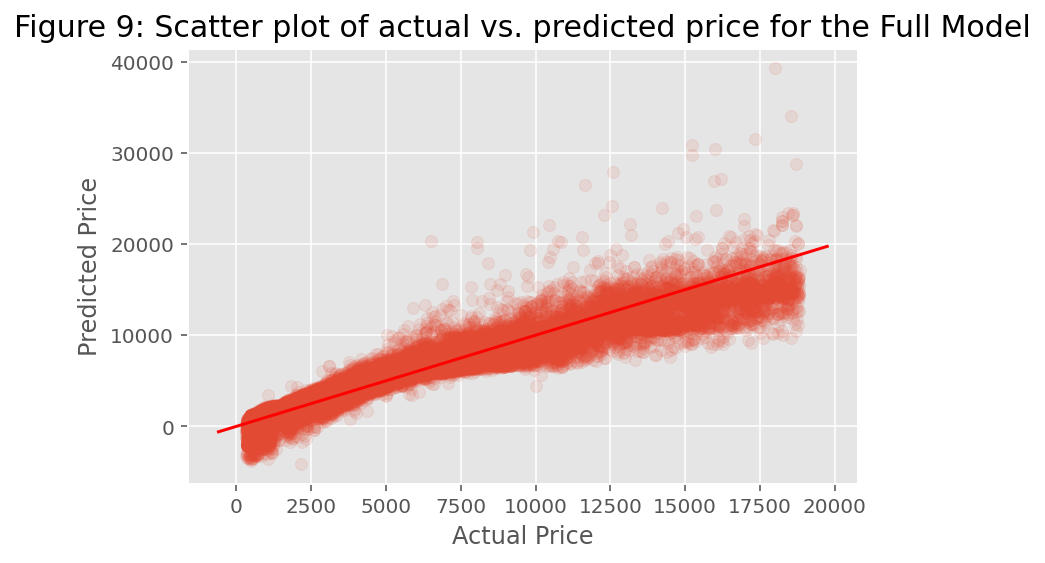

In [20]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.1);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 9: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

### Full Model Diagnostic Checks
We would like to check whether there are indications of violations of the regression assumptions, which are

1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals

Let's first get a scatter plot of residuals (as a function of predicted age).

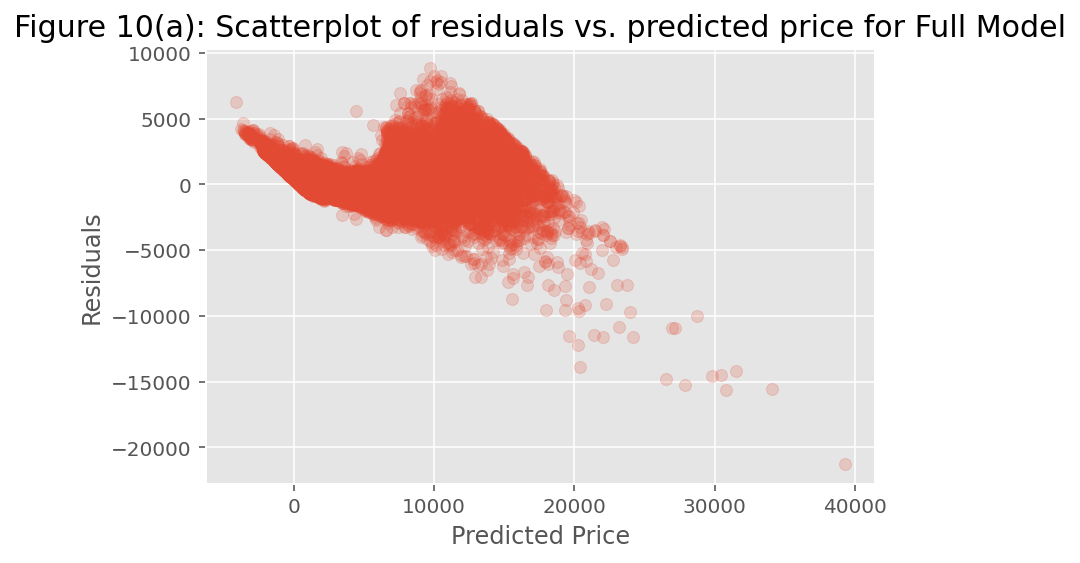

In [21]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.2);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

This plot is showing a strong skew of the data. The model seems to be under predicting on values above $15,000 by an extreme margin, showing extreme outliers.

Let's now plot actual price vs. residuals.

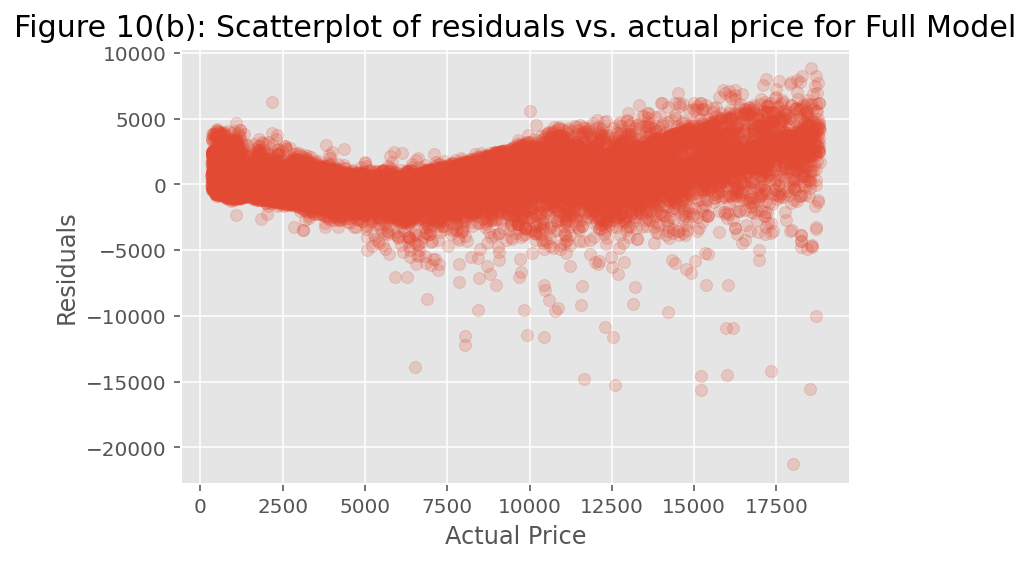

In [22]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.2);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

There is a distinct curve and widening in range of the residuals to the upper end of actual price. This would indicate the linearity and constant variance constraints are violated.

Let's overlay the histograms of actual vs. predicted price on the same plot.

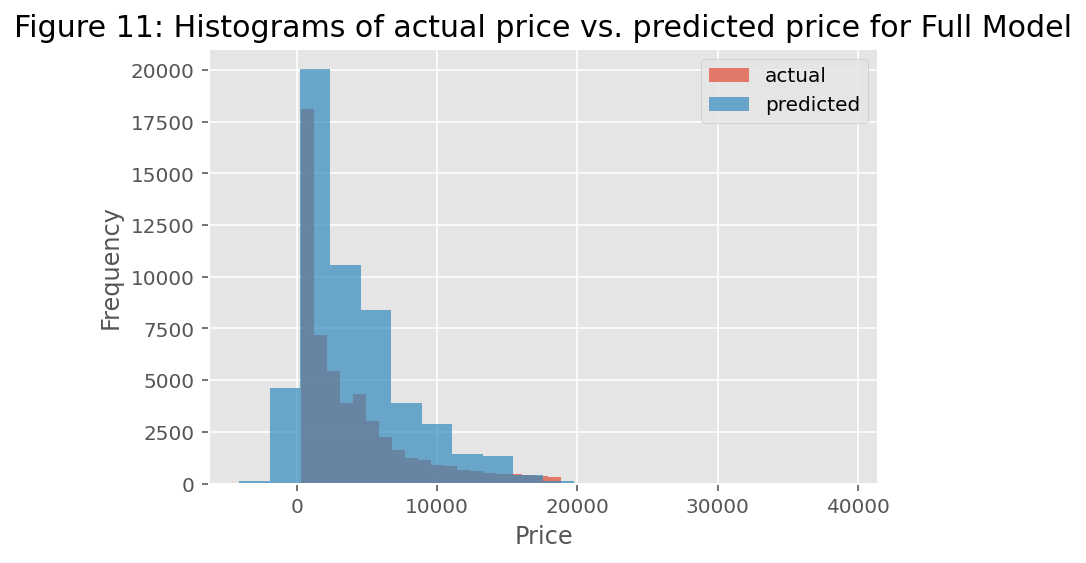

In [23]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual price vs. predicted price for Full Model', fontsize=15);
plt.legend()
plt.show();

Let's now have look at the histogram of the residuals.

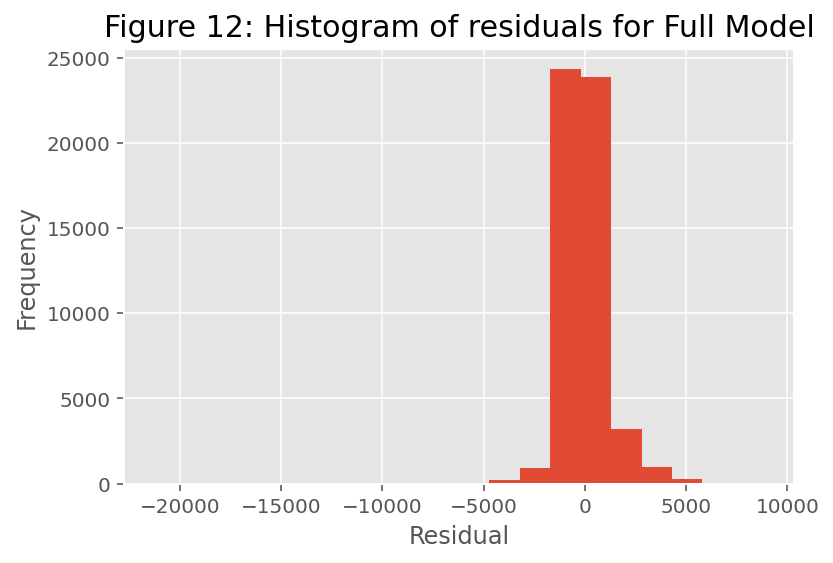

In [24]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of residuals for Full Model', fontsize=15);
plt.show();

In [25]:
residualsLog = np.log(residuals_full['residual'])

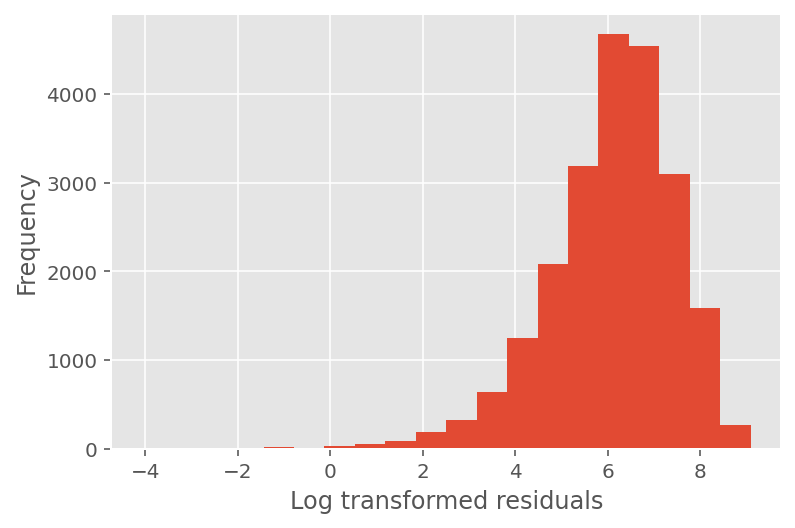

In [26]:
plt.hist(residualsLog, bins = 20);
plt.xlabel('Log transformed residuals');
plt.ylabel('Frequency');
plt.show();

As we can see more clearly by the log transformation on the residuals, there is a left skew present that would indicate the normality assumption of linear regression might be violated here.

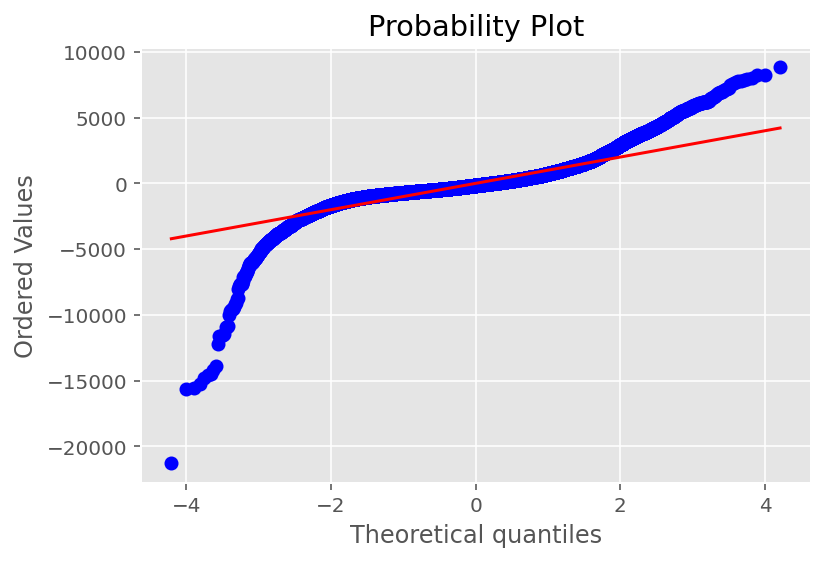

In [27]:
probplot(residuals_full['residual'], plot = plt)
plt.show(); 

Finally, this probability plot shows our model is a much better predictor within a certain range of the data.
We will now try to test with price > \\$2000 and price < \\$7000 to see how our results compare.

### Model fitting limited range of price data 

In [32]:
data_range = data[(data['price'] > 2000) & (data['price'] < 7000)]
data_range.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
90,0.70,Ideal,E,SI1,62.5,57.0,5.70,5.72,3.57,2757
91,0.86,Fair,E,SI2,55.1,69.0,6.45,6.33,3.52,2757
92,0.70,Ideal,G,VS2,61.6,56.0,5.70,5.67,3.50,2757
93,0.71,Very_Good,E,VS2,62.4,57.0,5.68,5.73,3.56,2759
94,0.78,Very_Good,G,SI2,63.8,56.0,5.81,5.85,3.72,2759


In [33]:
data_range.describe()

,carat,depth,table,x,y,z,price
count,20445.000000,20445.000000,20445.000000,20445.000000,20445.000000,20445.000000,20445.000000
mean,0.924657,61.819614,57.796366,6.202862,6.201361,3.833808,4050.907606
std,0.216932,1.617272,2.291182,0.486457,0.477058,0.307135,1374.887180
min,0.300000,43.000000,43.000000,4.330000,4.110000,1.070000,2001.000000
25%,0.720000,61.000000,56.000000,5.790000,5.800000,3.570000,2815.000000
50%,0.930000,61.900000,58.000000,6.250000,6.240000,3.870000,3973.000000
75%,1.040000,62.700000,59.000000,6.540000,6.530000,4.040000,5082.000000
max,3.000000,79.000000,79.000000,9.230000,9.100000,5.770000,6999.000000


Constructing the regression formula for the limited range of values model.

In [34]:
formula_string_indep_vars_range = ' + '.join(data_range.drop(columns='price').columns)
formula_string_range = 'price ~ ' + formula_string_indep_vars_range
print('formula_string: ', formula_string_range)

formula_string:  price ~ carat + cut + color + clarity + depth + table + x + y + z


The formula string above works just fine with the Statsmodels module. The problem, however, is that we cannot do automatic variable selection with this formula. What we need for this purpose is "one-hot-encoding" of categorical features. For more information on this encoding, please refer to this page.

In the code chunk below, we first use the get_dummies() function in Pandas for one-hot-encoding of categorical features and then we construct a new formula string with the encoded features.

In [35]:
# one-hot-encoding of categorical features
# for this to work correctly, variable data types (numeric or categorical)
# must be correctly specified within the Pandas dataframe
data_encoded_range = pd.get_dummies(data_range, drop_first=True)
data_encoded_range.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_D,color_E,color_F,color_G,color_H,color_I,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
90,0.70,62.5,57.0,5.70,5.72,3.57,2757,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
91,0.86,55.1,69.0,6.45,6.33,3.52,2757,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
92,0.70,61.6,56.0,5.70,5.67,3.50,2757,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
93,0.71,62.4,57.0,5.68,5.73,3.56,2759,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
94,0.78,63.8,56.0,5.81,5.85,3.72,2759,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


In [36]:
formula_string_indep_vars_encoded_range = ' + '.join(data_encoded_range.drop(columns='price').columns)
formula_string_encoded_range = 'price ~ ' + formula_string_indep_vars_encoded_range
print('formula_string_encoded: ', formula_string_encoded_range)

formula_string_encoded:  price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_D + color_E + color_F + color_G + color_H + color_I + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2


**For fun, let's add two interaction terms to our full model. Let's add the interaction of the capital feature with hours_per_week and race_White respectively.**

In [37]:
# formula_string_encoded_range = formula_string_encoded_range + ' + carat:cut_Ideal + carat:color_D + carat:clarity_IF '

**Also, let's add the square of the hours_per_week feature to illustrate how we can add higher order terms to our linear regression.**

In [38]:
# formula_string_encoded = formula_string_encoded + ' + np.power(hours_per_week, 2)'
# print('formula_string_encoded: ', formula_string_encoded)

Now that we have defined our statistical model formula as a Python string, we fit an OLS (ordinary least squares) model to our encoded data.

In [39]:
model_range = sm.formula.ols(formula=formula_string_encoded_range, data=data_encoded_range)
###
model_range_fitted = model_range.fit()
###
print(model_range_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     5863.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:05:11   Log-Likelihood:            -1.5601e+05
No. Observations:               20445   AIC:                         3.121e+05
Df Residuals:                   20421   BIC:                         3.123e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.525e+04    570.481    -44.266

The limited range model has an adjusted R-squared value of 0.869, which means that 87% of the variance is explained by the model. By looking at the p-values, we observe that all of them are still significant.

Due to such a low P value backward feature selection on this model would not change any results.

Let's define a new data frame for actual price vs. predicted price and the residuals for the full model. We will use this data frame when plotting predicted values and the regression residuals.

In [29]:
residuals_range = pd.DataFrame({'actual': data_encoded_range['price'], 
                            'predicted': model_range_fitted.fittedvalues, 
                            'residual': model_range_fitted.resid})
residuals_range.sample(10, random_state=999)

,actual,predicted,residual
16657,6662,5929.381241,732.618759
51544,2390,1690.905326,699.094674
5632,3879,3591.866970,287.133030
15960,6391,4893.969821,1497.030179
15234,6121,5728.078661,392.921339
49017,2055,1581.962639,473.037361
9108,4531,4610.841238,-79.841238
15605,6262,5703.901081,558.098919
14979,6037,5419.041414,617.958586
8339,4398,4678.608109,-280.608109


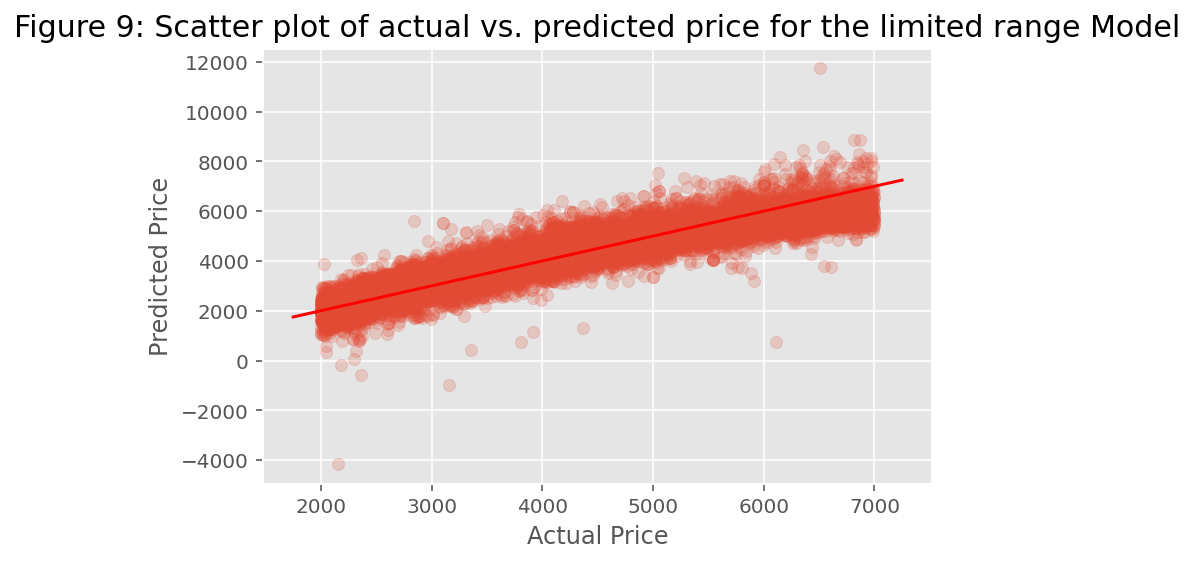

In [31]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_range['actual'], residuals_range['predicted'], alpha=0.2);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 9: Scatter plot of actual vs. predicted price for the limited range Model', fontsize=15);
plt.show();

#### Feature Selection

You can use the code below to to perform backward feature selection using p-values ([credit](https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb)).

In [28]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 2.561e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:43:44   Log-Likelihood:            -4.5364e+05
No. Observations:               53917   AIC:                         9.073e+05
Df Residuals:                   53890   BIC:                         9.076e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Return to [Table of contents](#contents)
___

## 2.3 Neural Network Model Fitting & Tuning <a id='2.3'></a>

Advanced Submission Mode Only

NOTE: Here is a link that Vural has provided to assist us https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-7-neural-networks-simple-case-study/

Return to [Table of contents](#contents)
___

# 3.0 Critique & Limitations <a id='3.0'></a>

Critique & Limitations of your approach: strengths and weaknesses in detail.

In our full model the condition number given to us by the statsmodels Ordinary Least Squares fit summary is large, at 13,400. This could be as all our data are to the right of price = 0, causing a high sensitivity around the y intercept. We can observe strange modelling in this area where the model suggests negative prices for diamonds with certain physical attributes, however a negative price is not possible for this object. Seeing as we are not interested in our model giving an accurate y intercept, as a price of zero is not possible, this is not of great concern.

When plotting actual price against predicted price with the full model and full dataset we see a slight bend. This led us to investigate whether linear regression was appropriate, or fails to accurately describe the data. Whilst the curve is visible, the intense density of records near the models prediction gives us an adjusted $R^{2}$ of .922 which indicates that any change in our models predictor variables will explain 92.2% of the change in our target variable.

Another concern of ours was the accuracy of our prediction as the price increases. When plotting actual price against predicted price we see variability increasing as the price exceeds \\$7000, we have created a model, using a dataset with only those records under \\$7000 and above \\$xxx TODO. In this range our model's residuals are far more linear, with a more consistent variability. We must consider which model provides more use to us, the original will provide a less accurate model for diamonds of any price, whereas the latter model is only intended for diamonds within a certain price range. Diamonds have a large variability in price in the real world, with prices reaching millions of dollars, however at this upper bound there are many influences on the price which may not be explained by physical characteristics, or at least, not in a linear fashion. The model with a limited bound of price would provide incredible accuracy at (TODO INSERT R^2 VALUE OF LIMITED MODEL HERE) for diamonds of a price from (TODO LOWER BOUND) - \\$7000. This accuracy and a range of several thousands of dollars will provide use to everyone involved in the diamond market.

Return to [Table of contents](#contents)
___

# 4.0 Summary & Conclusions <a id='4.0'></a>

## 4.1 Project Summary <a id='4.1'></a>

A comprehensive summary of your entire project (both Phase 1 and Phase 2). That is, what exactly did you do in your project? (Example: I first cleaned the data in such and such ways. And then I applied multiple linear regression techniques in such and such ways. etc).

Return to [Table of contents](#contents)
___

## 4.2 Summary of Finding <a id='4.2'></a>

A comprehensive summary of your findings. That is, what exactly did you find about your particular problem?

Return to [Table of contents](#contents)
___

## 4.3 Conclusions <a id='4.3'></a>

Your detailed conclusions as they relate to your goals and objectives.

Return to [Table of contents](#contents)
___